# Chaining a PCA and a logistic regression

The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA

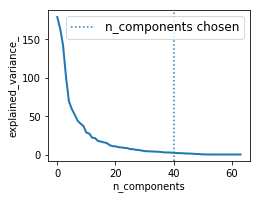

In [3]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

(1797, 64)


<Figure size 432x288 with 0 Axes>

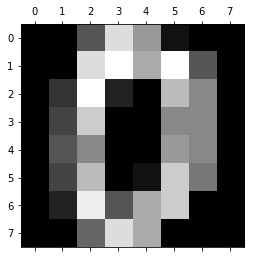

In [12]:
# Compare the performance
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# load digital data
digits, dig_label = load_digits(return_X_y=True)
print(digits.shape)

# draw one digital
plt.gray() 
plt.matshow(digits[0].reshape([8, 8])) 
plt.show() 


In [9]:

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))


accuracy train = 0.998608, accuracy_test = 0.897222


In [19]:
# do PCA with 'n_components=40'
pca = decomposition.PCA(n_components=40)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train_pca,y_train)

pred_train = lr.predict(x_train_pca)
pred_test  = lr.predict(x_test_pca)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))


accuracy train = 0.987474, accuracy_test = 0.894444


## References
* [Pipelining: chaining a PCA and a logistic regression](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html)